#  Import libraries

In [23]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB  # Corrected import
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#  Data visualization - Pairplot

In [24]:



csv_file_path = '/home/souvik/Documents/Code/Python/Machine-Learning-Lab/Classification Comparision/diabetes.csv' 
df = pd.read_csv(csv_file_path)

print("Available columns in the CSV:", df.columns.tolist())
print(df.head())
scaler = MinMaxScaler()
df[df.columns.drop('Outcome')] = scaler.fit_transform(df[df.columns.drop('Outcome')])

print("Data after normalization:")
print(df.head())



Available columns in the CSV: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Data after normalization:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164     

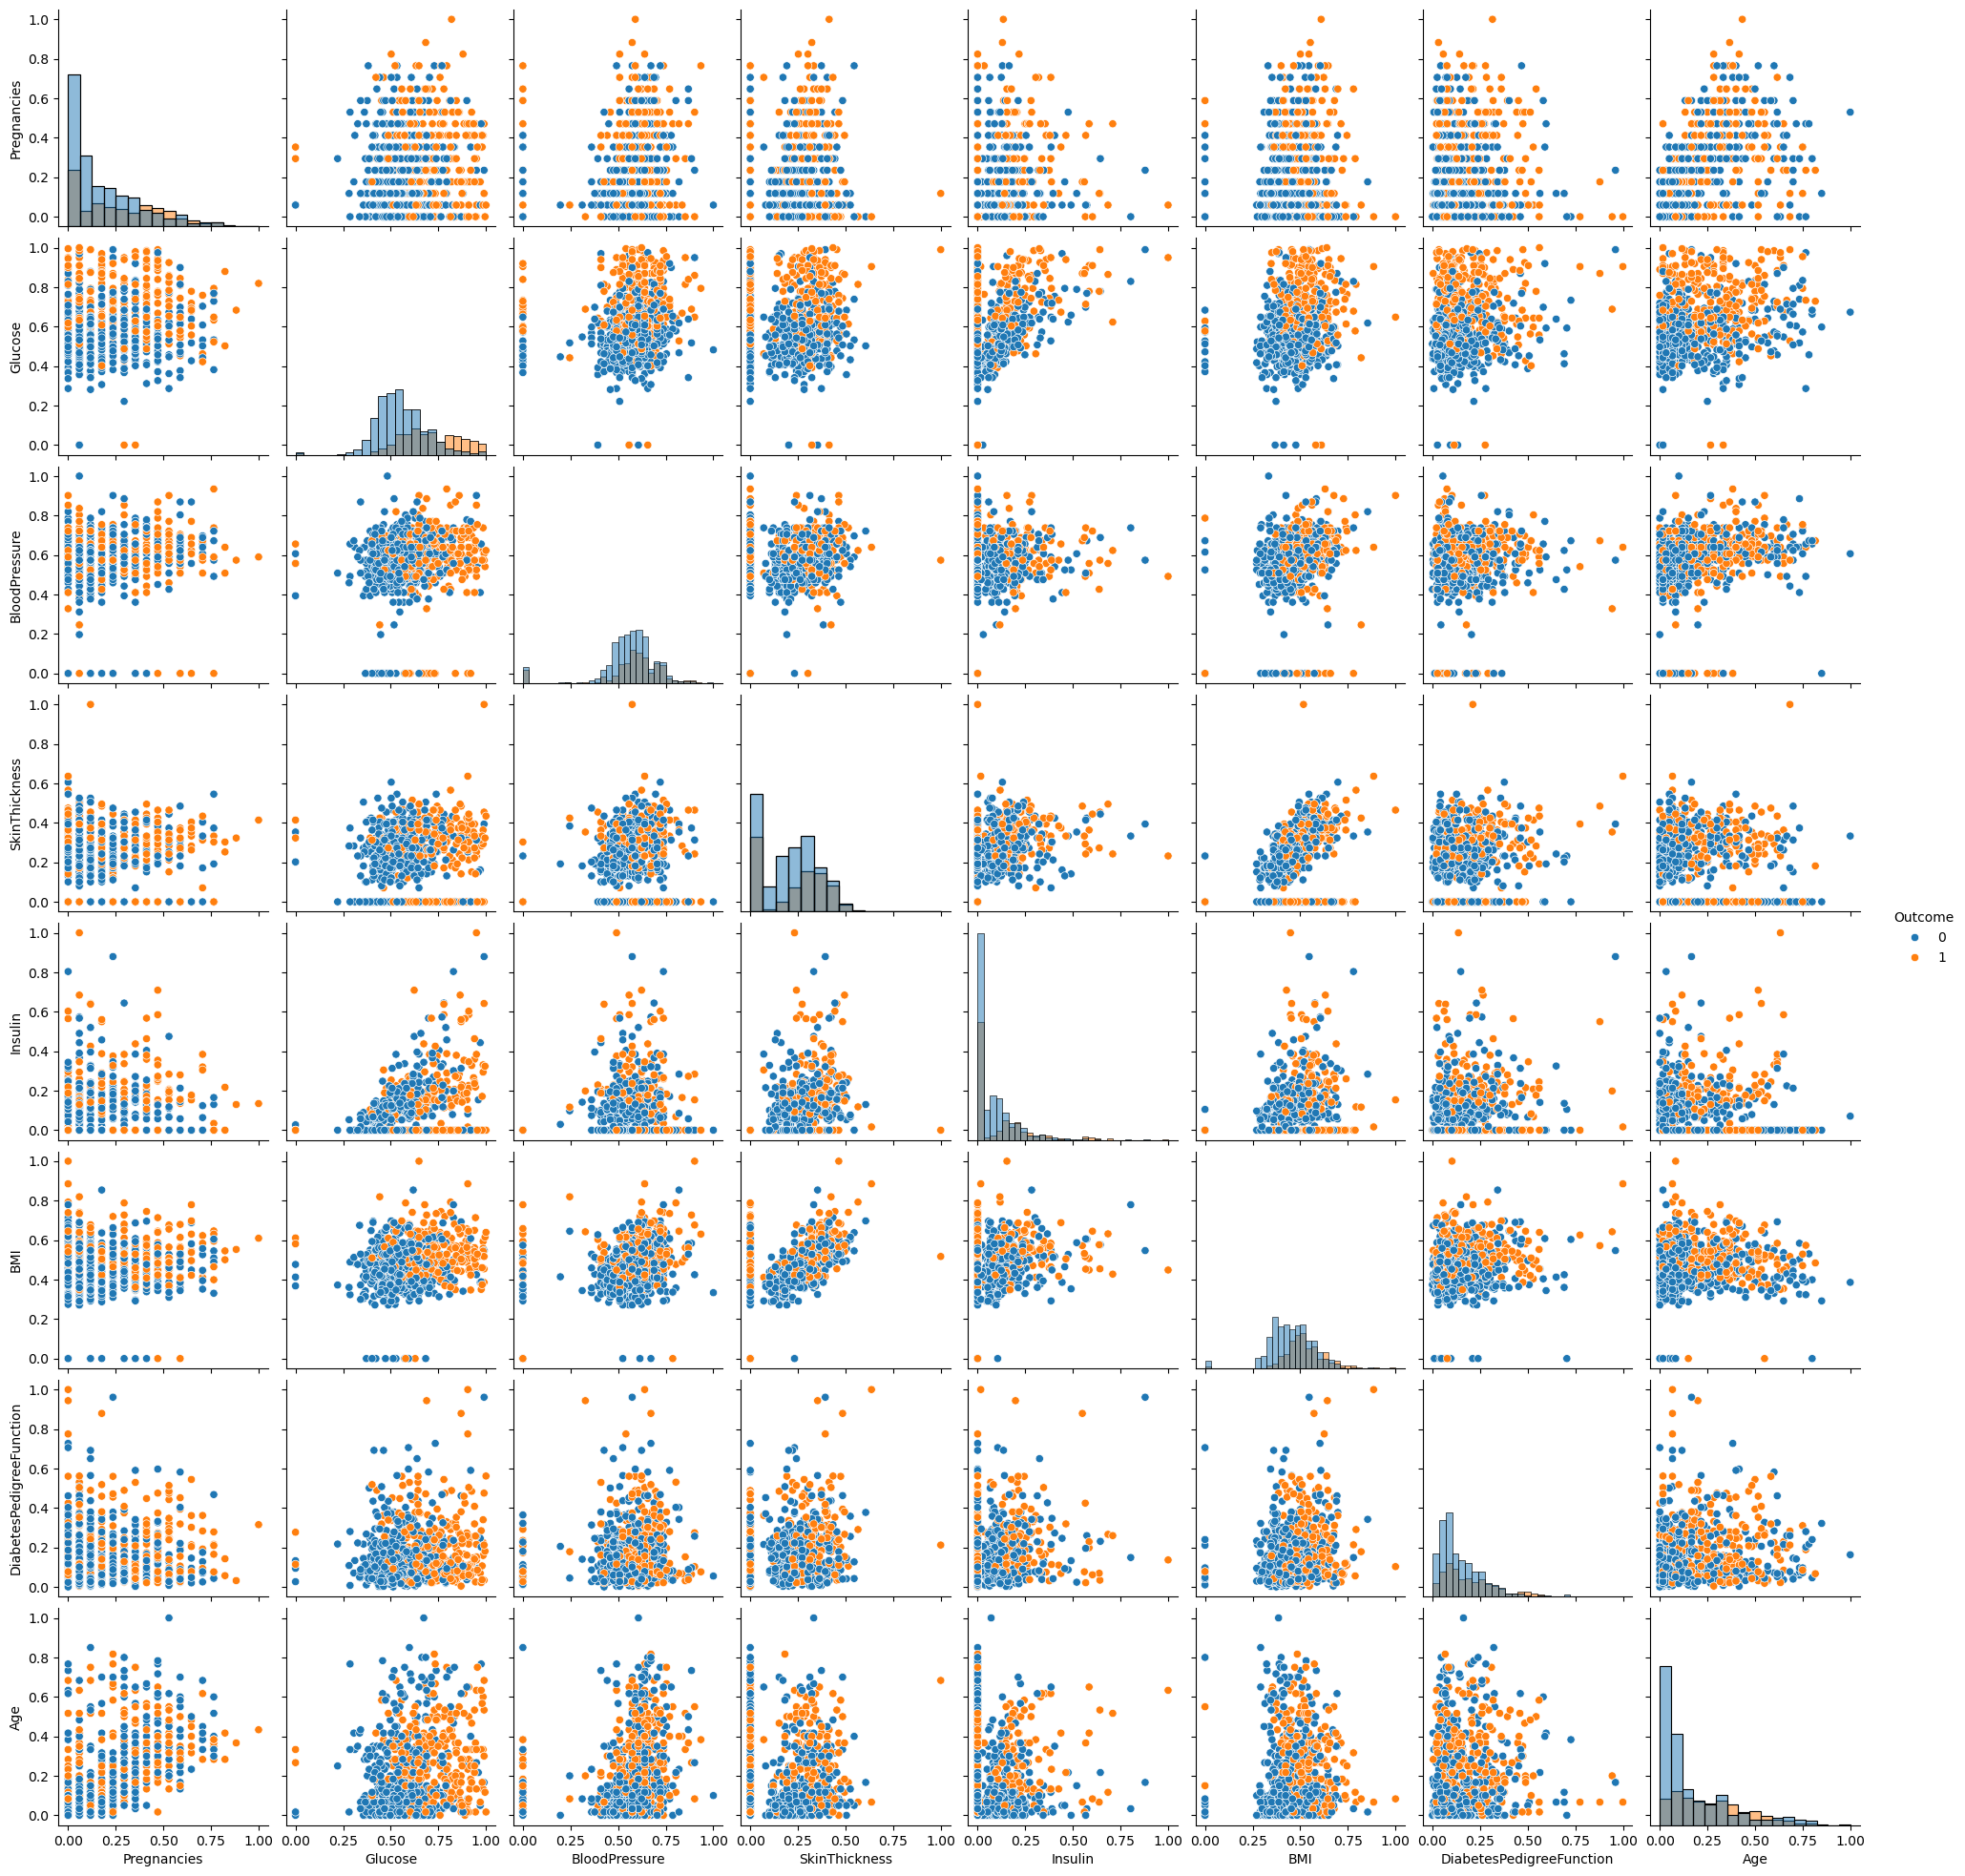

In [25]:
target_column = 'Outcome'  

X = df.drop(columns=[target_column]).select_dtypes(include=['float64', 'int64']).values
y = df[target_column].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_vis = df.drop(columns=[target_column]).select_dtypes(include=['float64', 'int64'])
df_vis['Outcome'] = y

# Generate pairplot
sns.pairplot(df_vis, hue='Outcome', diag_kind='hist')
plt.show()

# Data visualization - Boxplots


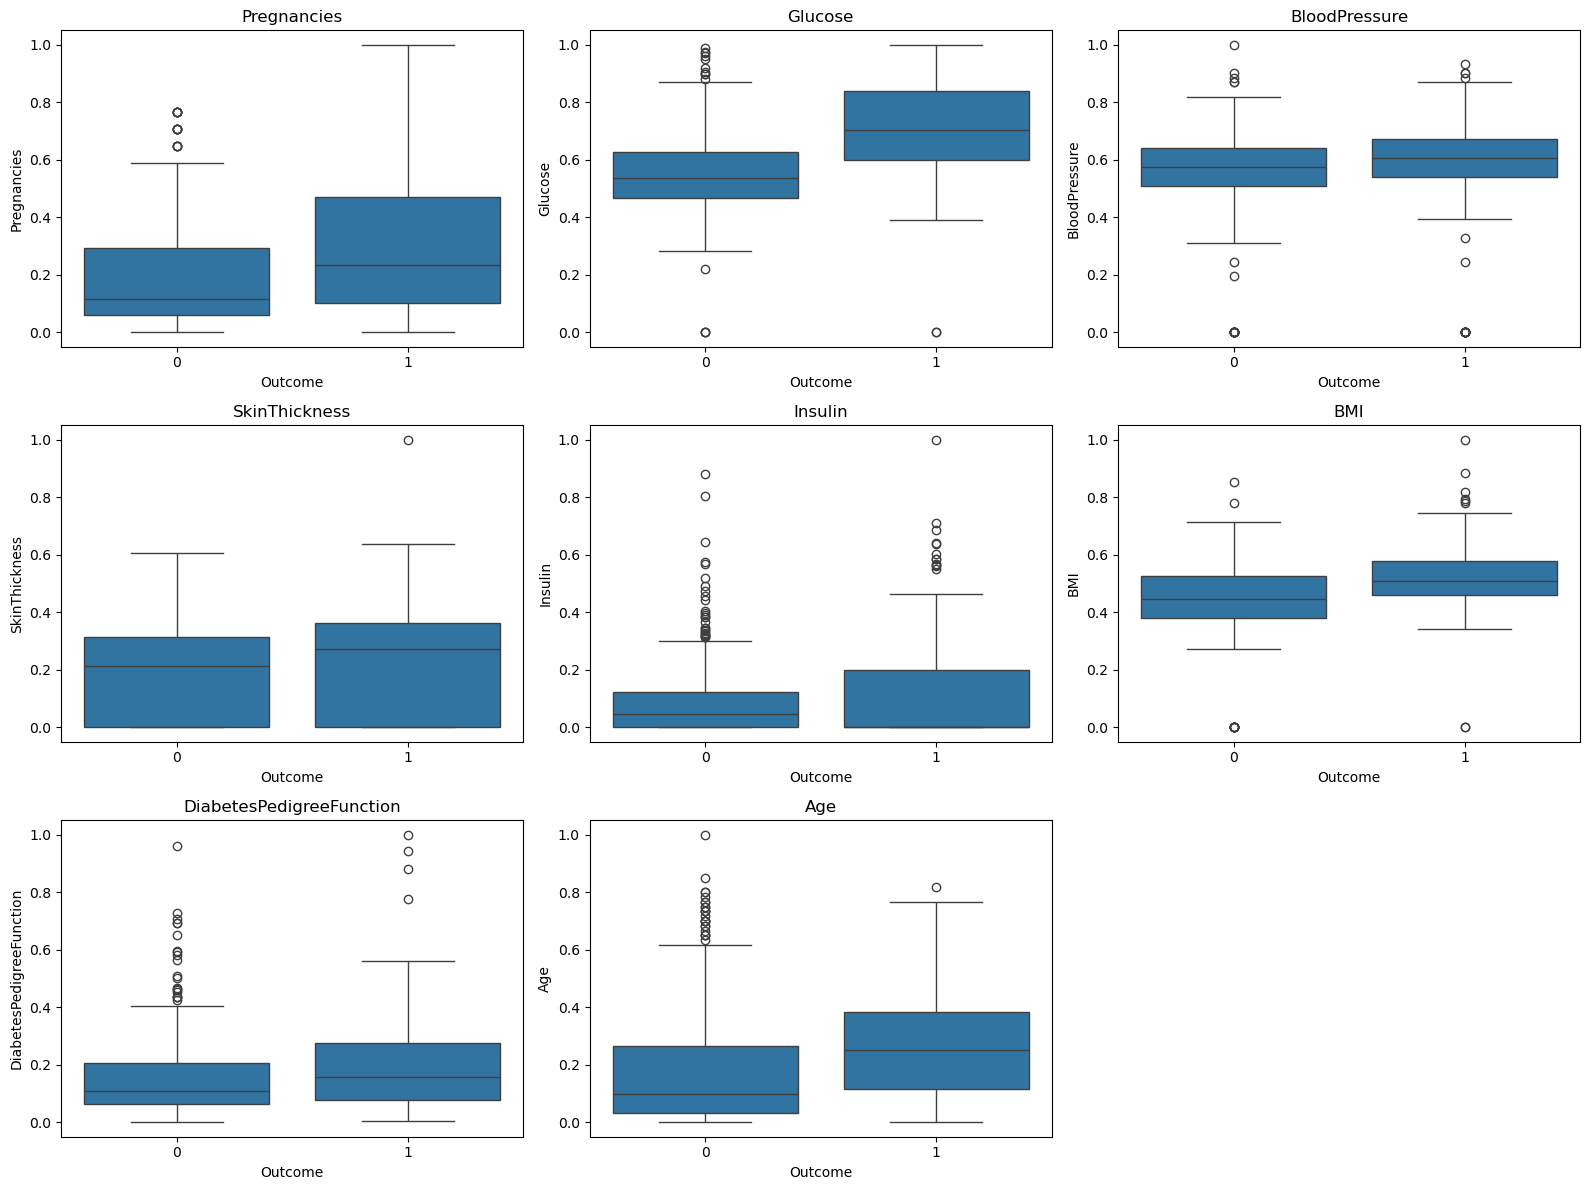

In [26]:
plt.figure(figsize=(16, 12))
features = df.columns.drop('Outcome')
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(feature)
plt.tight_layout()
plt.show()

#  Logistic Regression


In [27]:
log_reg = LogisticRegression(multi_class='ovr', max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
lr_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr, average='macro'),
    'Precision': precision_score(y_test, y_pred_lr, average='macro'),
    'F1-Score': f1_score(y_test, y_pred_lr, average='macro')
}
print("Logistic Regression Metrics:", lr_metrics)

Logistic Regression Metrics: {'Model': 'Logistic Regression', 'Accuracy': 0.7662337662337663, 'Recall': 0.7252525252525253, 'Precision': 0.7500509683995923, 'F1-Score': 0.7334615384615384}


/home/souvik/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


#  Multinomial Naive Bayes


In [28]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_metrics = {
    'Model': 'Multinomial Naive Bayes',
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb, average='macro'),
    'Precision': precision_score(y_test, y_pred_nb, average='macro'),
    'F1-Score': f1_score(y_test, y_pred_nb, average='macro')
}
print("Multinomial Naive Bayes Metrics:", nb_metrics)

Multinomial Naive Bayes Metrics: {'Model': 'Multinomial Naive Bayes', 'Accuracy': 0.6428571428571429, 'Recall': 0.5, 'Precision': 0.32142857142857145, 'F1-Score': 0.391304347826087}


/home/souvik/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#  SVM


In [29]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_metrics = {
    'Model': 'SVM',
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm, average='macro'),
    'Precision': precision_score(y_test, y_pred_svm, average='macro'),
    'F1-Score': f1_score(y_test, y_pred_svm, average='macro')
}
print("SVM Metrics:", svm_metrics)

SVM Metrics: {'Model': 'SVM', 'Accuracy': 0.7467532467532467, 'Recall': 0.7141414141414142, 'Precision': 0.7242307692307692, 'F1-Score': 0.7182266009852216}


#  Random Forest


In [30]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf, average='macro'),
    'Precision': precision_score(y_test, y_pred_rf, average='macro'),
    'F1-Score': f1_score(y_test, y_pred_rf, average='macro')
}
print("Random Forest Metrics:", rf_metrics)

Random Forest Metrics: {'Model': 'Random Forest', 'Accuracy': 0.7207792207792207, 'Recall': 0.6979797979797979, 'Precision': 0.6964285714285714, 'F1-Score': 0.6971692504687428}


# Results Summary

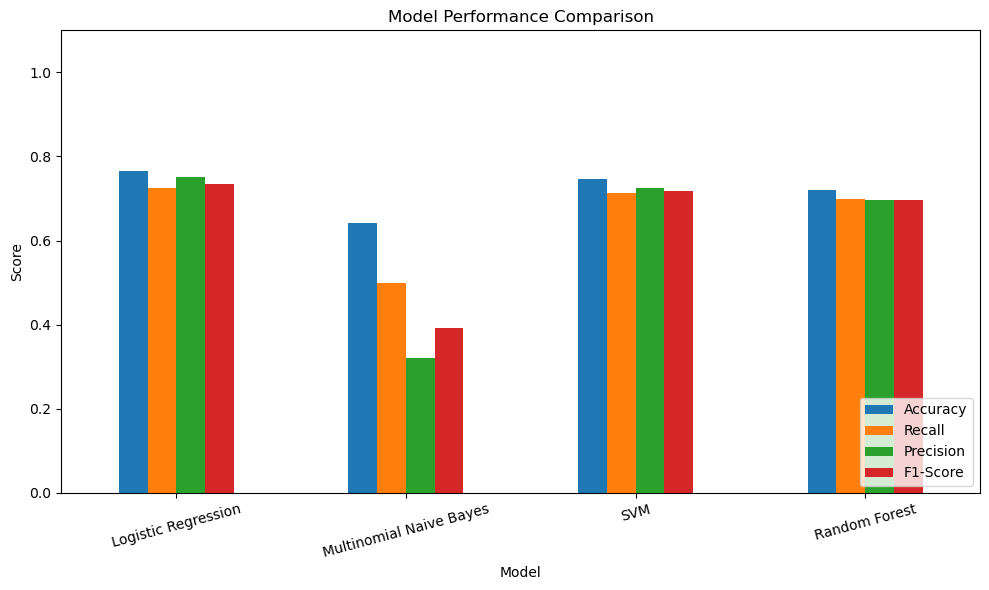

In [31]:
metrics_df = pd.DataFrame([lr_metrics, nb_metrics, svm_metrics, rf_metrics])
metrics_df.set_index('Model', inplace=True)


metrics_df.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()